In [1]:
import numpy as np
import pandas as pd
from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [4]:
AVG = 6.3 

n=15 #number of events



P = (AVG**n)*(np.exp(-AVG))/np.math.factorial(n)

print(P)

X = 15
Y = 6.3
sigma = np.sqrt(Y)


Z = abs(X - Y) / sigma
print("Z :", Z)

0.001372629709714795
Z : 3.4661629670697414


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [9]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])





STD_pre = np.std(pre)
STD_post = np.std(post)


STD = np.sqrt((STD_pre**2 + STD_post**2)/2) 





T = (np.average(pre) - np.average(post)) / (STD * np.sqrt(2/len(post)))
print('T = ', T,'\n\n', 'p = ', stats.t.cdf(T, len(post)-1))


T =  -3.991846326292112 

 p =  0.0015744704677267873


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

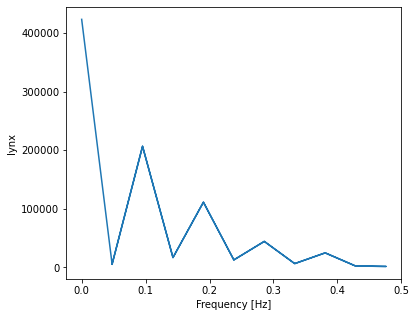

0.09523809523809523
Period: 10.5  Seems fine with what expected from previous exercise set.


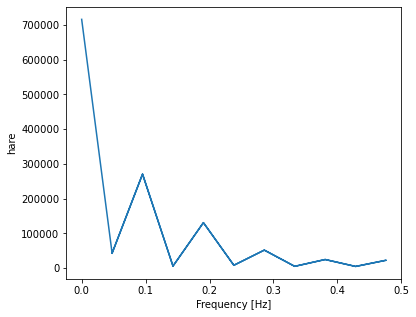

0.09523809523809523
Period: 10.5  Same result.


In [11]:
from scipy import fftpack
import pandas as pd
import numpy as np

#loading data
fin = np.loadtxt("populations.txt")
year = np.array(fin[:,0])
hare = np.array(fin[:,1])
lynx = np.array(fin[:,2])
carrot = np.array(fin[:,3])

#fourier transform + abs value
lynx_fft = fftpack.fft(lynx)
sample_freq = fftpack.fftfreq(lynx.size)
power = np.abs(lynx_fft)

#plotting lynx figure
plt.figure(figsize=(6, 5))
plt.plot(np.abs(sample_freq), power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('lynx')
plt.show()


lynx_freqs = sample_freq[np.where(sample_freq > 0)]
lynx_freq = lynx_freqs[power[np.where(sample_freq > 0)].argmax()]
print(lynx_freq)
print("Period:", 1/lynx_freq, " Seems fine with what expected from previous exercise set.")

#Same analysis on Hares. We expect the same result as these two populations are strongly correlated
hares_fft = fftpack.fft(hare)
sample_freq_h = fftpack.fftfreq(hare.size)
power = np.abs(hares_fft)

plt.figure(figsize=(6, 5))
plt.plot(np.abs(sample_freq), power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('hare')
plt.show()

hare_freqs = sample_freq[np.where(sample_freq_h > 0)]
hare_freq = hare_freqs[power[np.where(sample_freq_h > 0)].argmax()]
print(hare_freq)
print("Period:", 1/hare_freq, " Same result.")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

/var/folders/5b/8vg6qgt963d5ft3ry2bjyrn40000gn/T/ipykernel_9744/4156986411.py:5: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  image = plt.imread('https://i.stack.imgur.com/VxtPG.png')


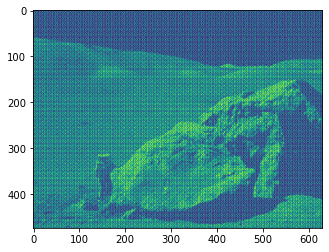

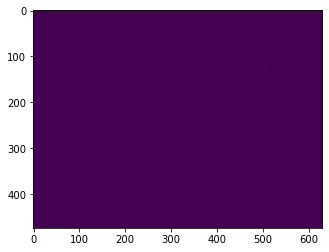

No way to recognise the image from its fourier tfm. 


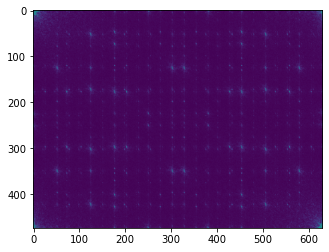

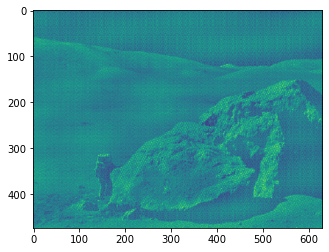

In [15]:
import matplotlib.pyplot as plt
from scipy import fftpack

#loading image
image = plt.imread('https://i.stack.imgur.com/VxtPG.png')
plt.imshow(image)
plt.show()

#Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
im_fft = fftpack.fft2(image)
plt.imshow(np.abs(im_fft))
plt.show()
print("No way to recognise the image from its fourier tfm. ")
im_fft[np.abs(im_fft)>2000] = 0
plt.imshow(np.abs(im_fft))
plt.show()

inverse = fftpack.ifft2(im_fft)
plt.imshow(inverse.real);